<a href="https://colab.research.google.com/github/HariniDavu/Sentiment_analysis_using_ML/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

import re
import nltk
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
from ctypes import sizeof
train = pd.read_csv('/content/twitter_training.csv',header=None)
val = pd.read_csv('/content/twitter_validation.csv',header=None)
train.columns = ['id','information','sentiment','text']
val.columns = ['id','information','sentiment','text']

train.head()


#train.size

#fet=train.groupby('sentiment')['sentiment'].count()/train.size*100
#print(fet)

,id,information,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
val.head()

,id,information,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


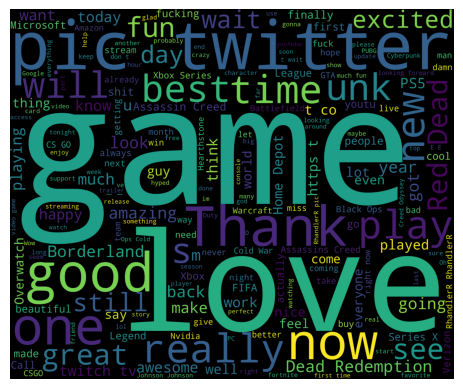

In [4]:
df1 = train[train['sentiment']=='Positive']
words = ' '.join(df1['text'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

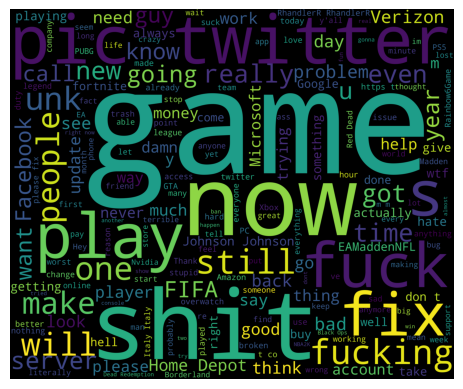

In [5]:
df2 = train[train['sentiment']=='Negative']
words = ' '.join(df2['text'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

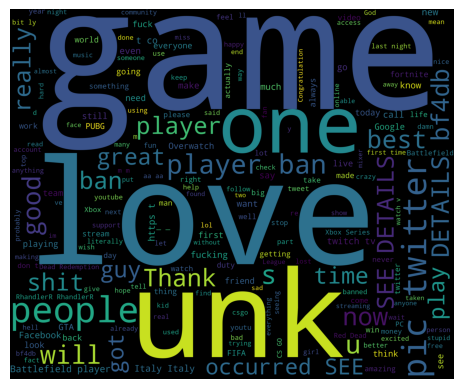

In [6]:
df3 = train[train['sentiment']=='Irrelevant']
words = ' '.join(df3['text'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

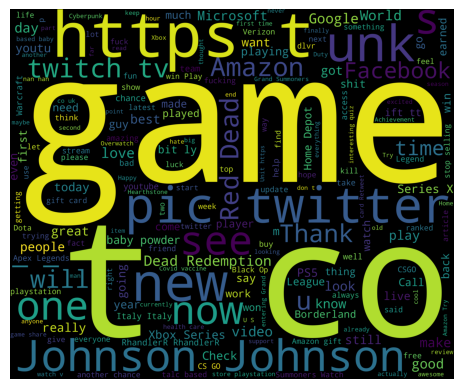

In [7]:
df4 = train[train['sentiment']=='Neutral']
words = ' '.join(df4['text'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [8]:
#Count information per category
plot1=train.groupby(by=["information","sentiment"]).count().reset_index()
plot1.head(100)

,information,sentiment,id,text
0,Amazon,Irrelevant,192,186
1,Amazon,Negative,576,575
2,Amazon,Neutral,1236,1207
3,Amazon,Positive,312,308
4,ApexLegends,Irrelevant,192,192
...,...,...,...,...
95,PlayStation5(PS5),Positive,942,936
96,PlayerUnknownsBattlegrounds(PUBG),Irrelevant,906,895
97,PlayerUnknownsBattlegrounds(PUBG),Negative,696,678
98,PlayerUnknownsBattlegrounds(PUBG),Neutral,264,263


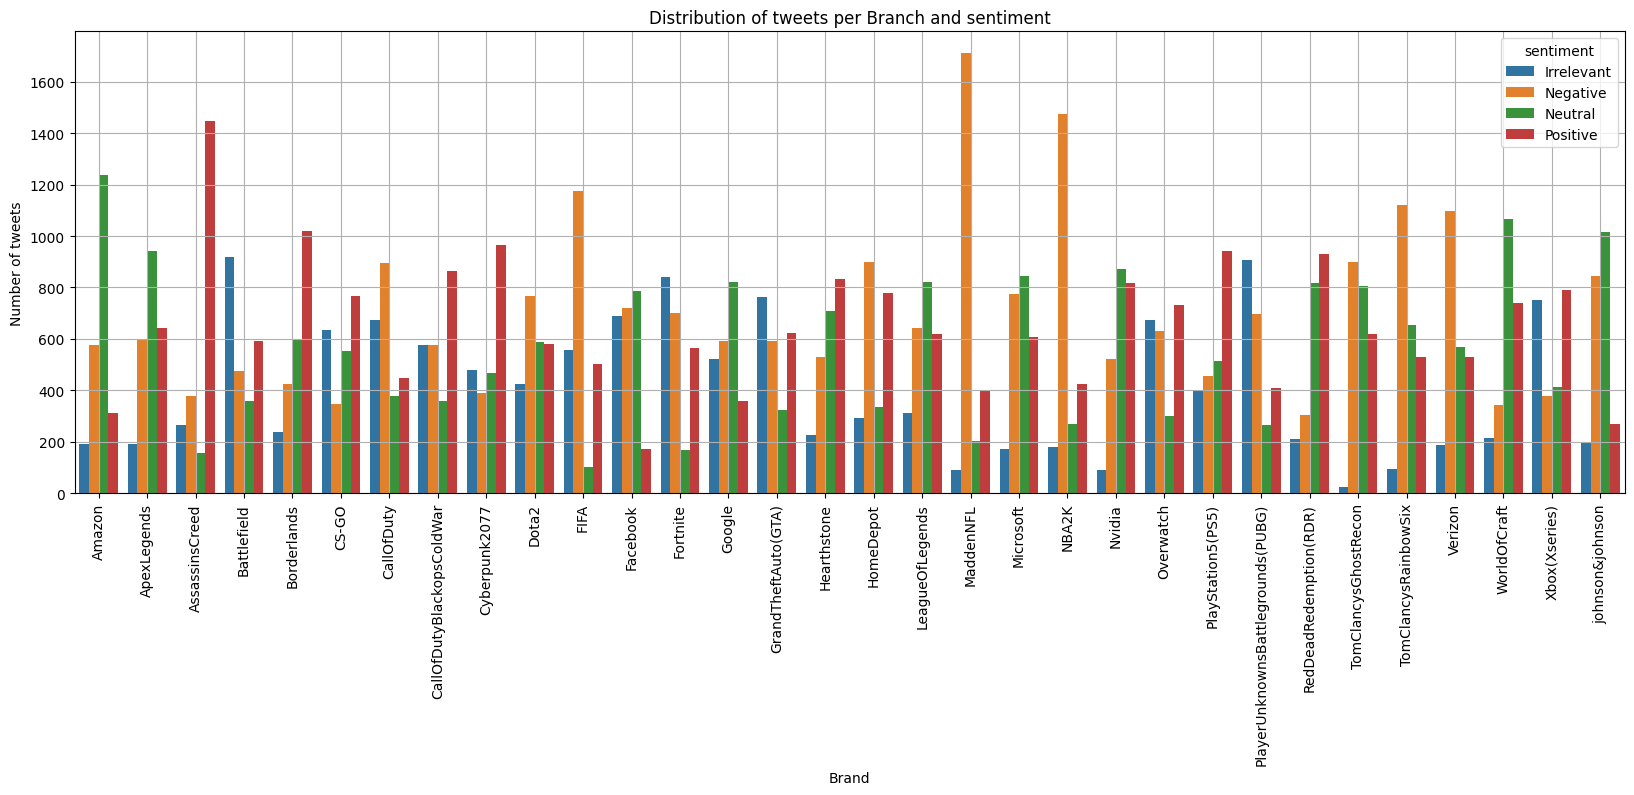

In [9]:
#Figure of comparison per branch
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="information",y="id",hue="sentiment")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and sentiment");

In [10]:
import nltk
import re
from nltk.corpus import stopwords

In [11]:
def tweet_to_words(tweet):
    letters_only = re.sub('^[a-zA-Z]',' ',tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_word = [w for w in words if w not in stops]
    return ' '.join(meaningful_word)

In [12]:
def tweet_len(tweet):
    letters_only = re.sub('^[a-zA-Z]',' ',tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_word = [w for w in words if w not in stops]
    return (len(meaningful_word))

In [13]:
train['sentiments'] = train['sentiment'].apply(lambda x:0 if x=='negative' else 1)
train['clean_tweet'] = train['text'].astype(str).apply(lambda x:tweet_to_words(x))
train['tweet_length'] = train['text'].astype(str).apply(lambda x:tweet_len(x))
train_data, test_data = train_test_split(train,test_size=0.2,random_state=42)

In [14]:
train_clean_tweet = []
for tweet in train_data['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet = []
for tweet in test_data['clean_tweet']:
    test_clean_tweet.append(tweet)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer='word')
train_features = v.fit_transform(train_clean_tweet)
test_features = v.transform(test_clean_tweet)

In [16]:
#from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC, LinearSVC, NuSVC
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [17]:
Classifiers = [

    KNeighborsClassifier(3),
    RandomForestClassifier(n_estimators=200)]